## Decision Trees: Information Based Learning

### Example: A Guess Who Card Game

(Source: Fundamentals of Machine Learning for Predictive Data Analytics, MIT Press, 2015)

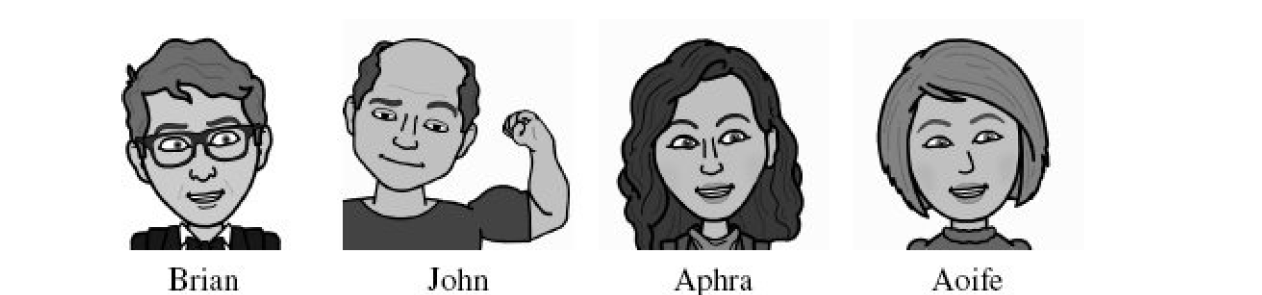

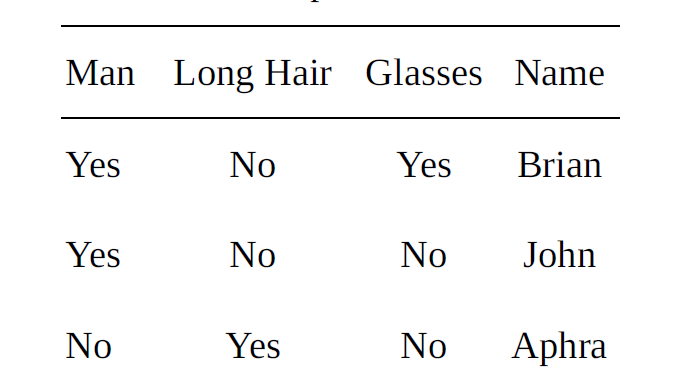

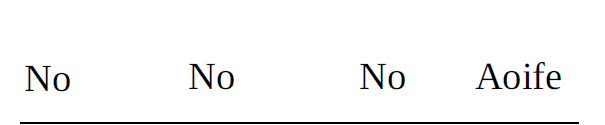

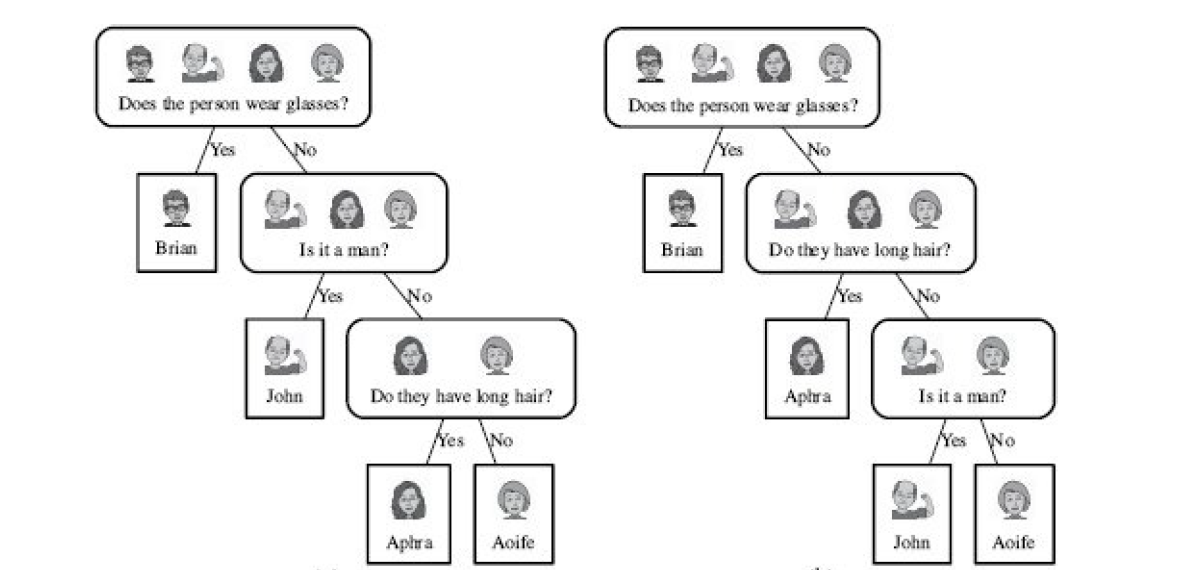

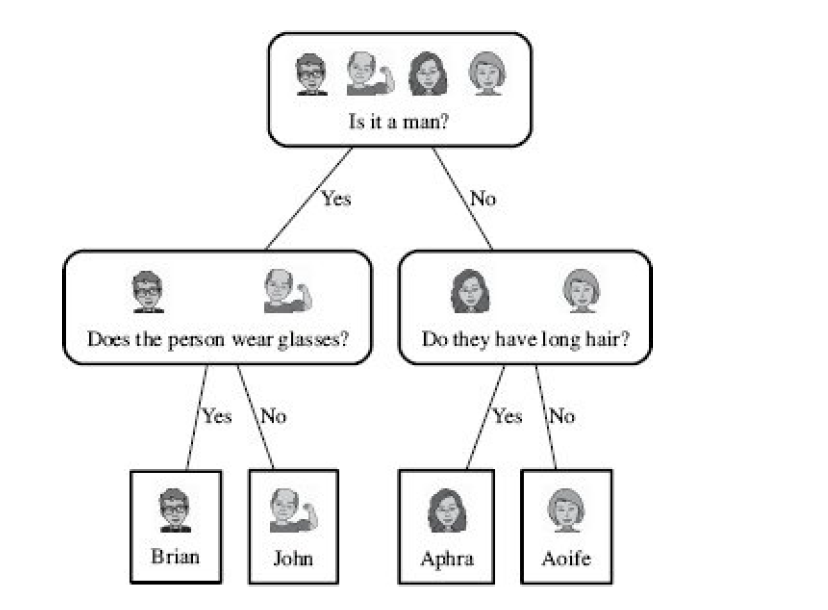

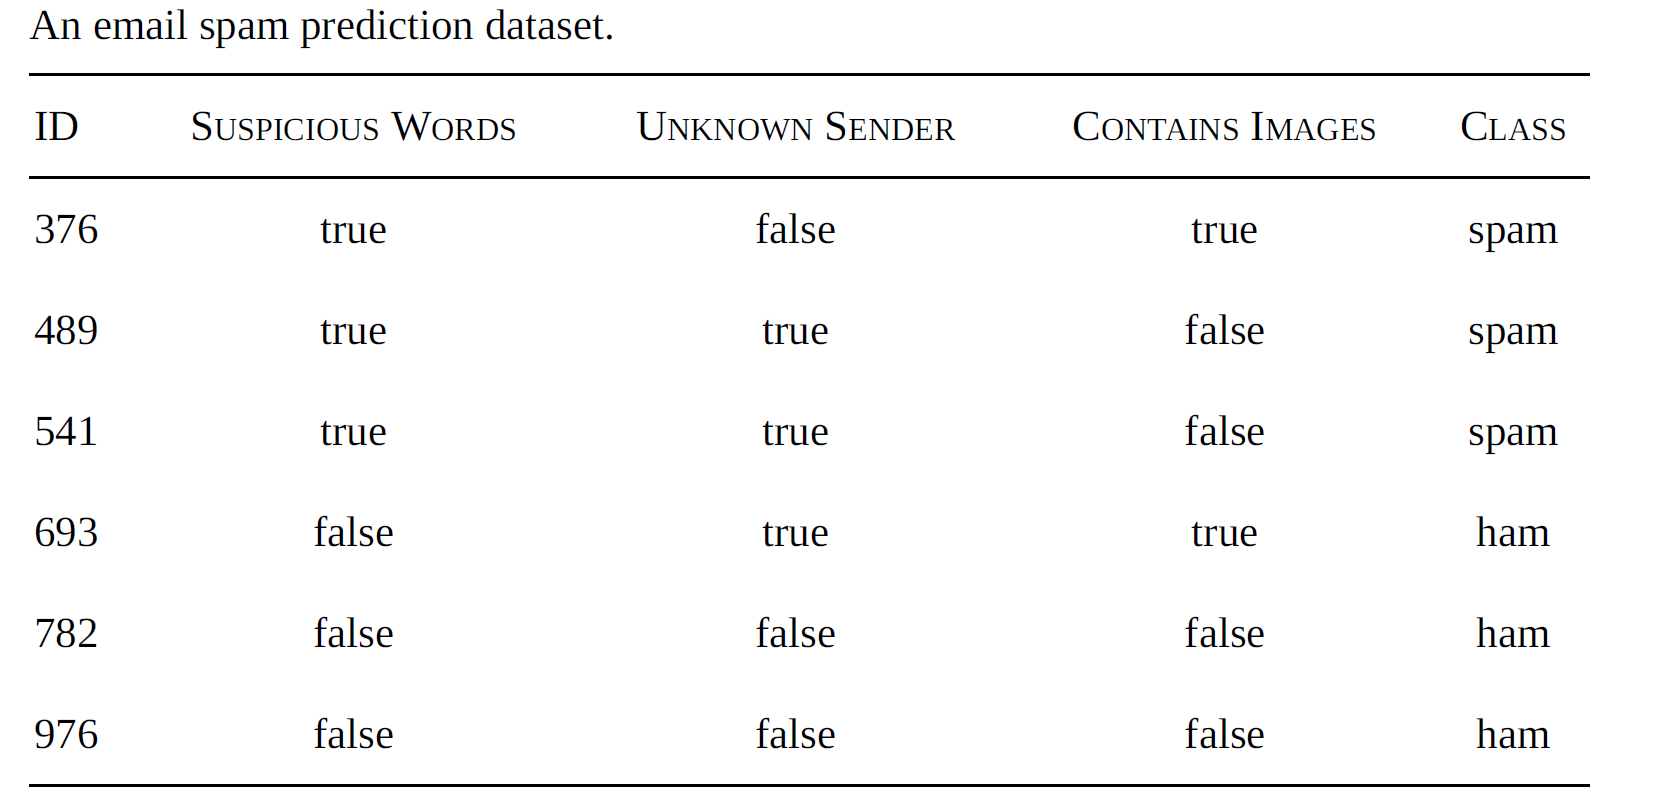

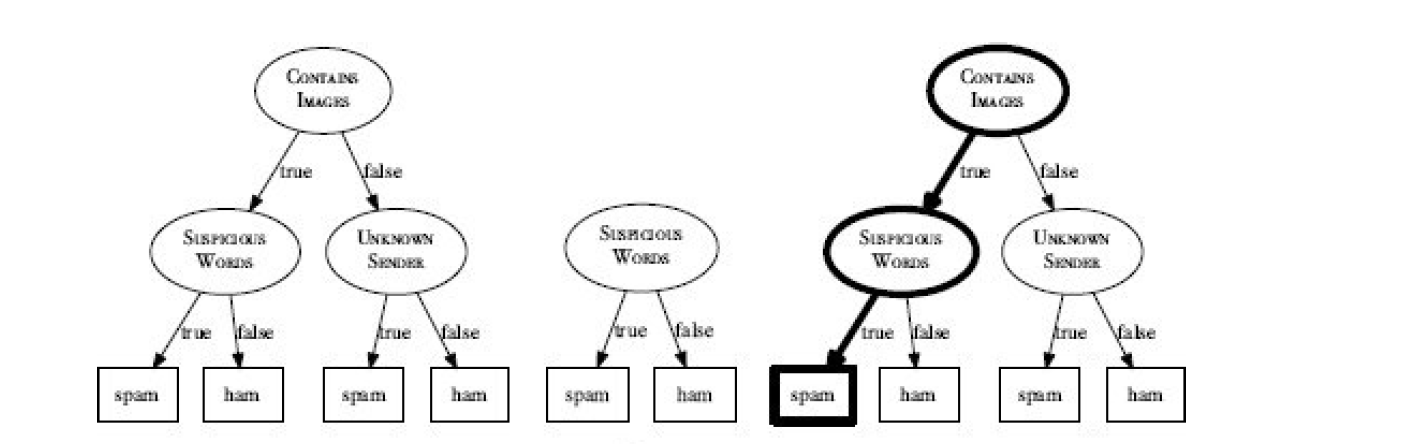

## Shannon's Entropy Model
#### Defines a computational measure of the impurity of the elements in a set
To measure the discriminatory power of a descriptive feature, we analyze the size and probability of each set of instances created, when we test the value of the feature and calculate how pure each splitted set is with respect to the target feature values of the training examples it contains. The formal measure to do this is Shannon’s entropy model.

#### Entropy is a measure of uncertainty associated with guessing the result if you were to make a random selection from the set.
Lower the probability (higher uncertainty) of a specific event, higher the Entropy. In other words, Entropy is inversely propotional to probability measure

A simple way to meaure Entropy: Binary logarithm
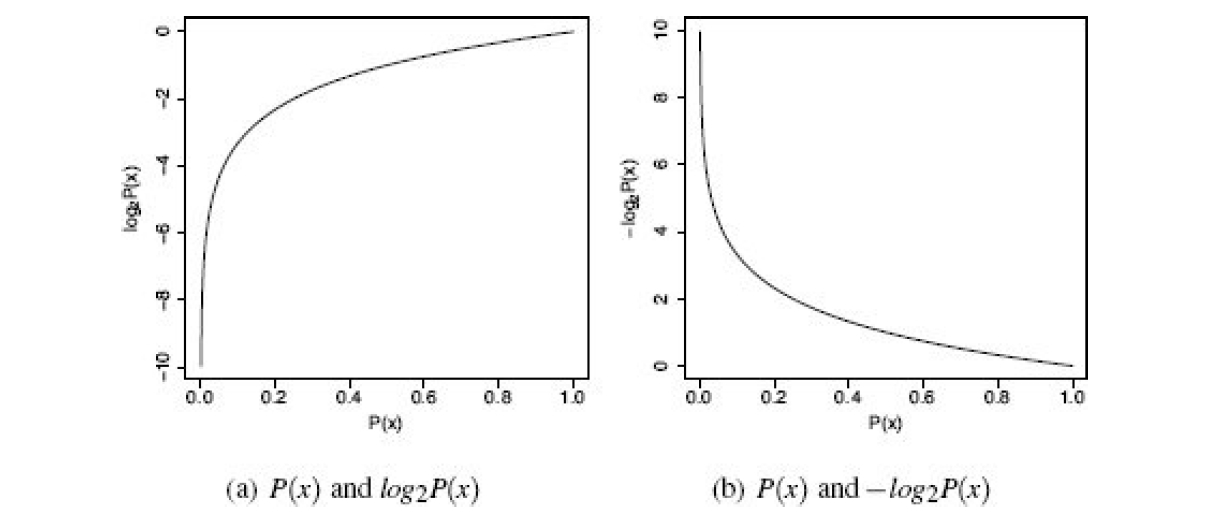

Shannon’s model of entropy is a weighted sum of the logs of the probabilities of each possible outcome when we make a random selection from a set. The weights used in the sum are the probabilities of the outcomes themselves so that outcomes with high
probabilities contribute more to the overall entropy of a set than outcomes with low probabilities. Shannon’s model of entropy is defined as:

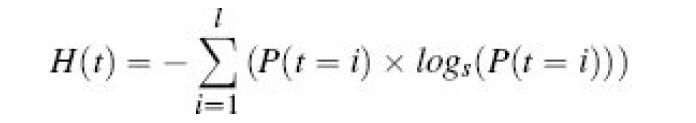

### Calculation for measuring Entropy of a set of 52 playing cards 
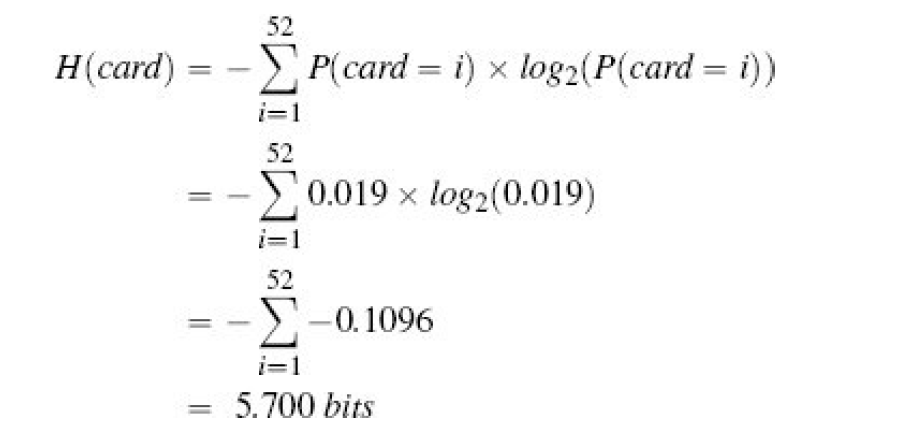

###  Calculation for measuring Entropy when we want to split our cards deck based on the suite 
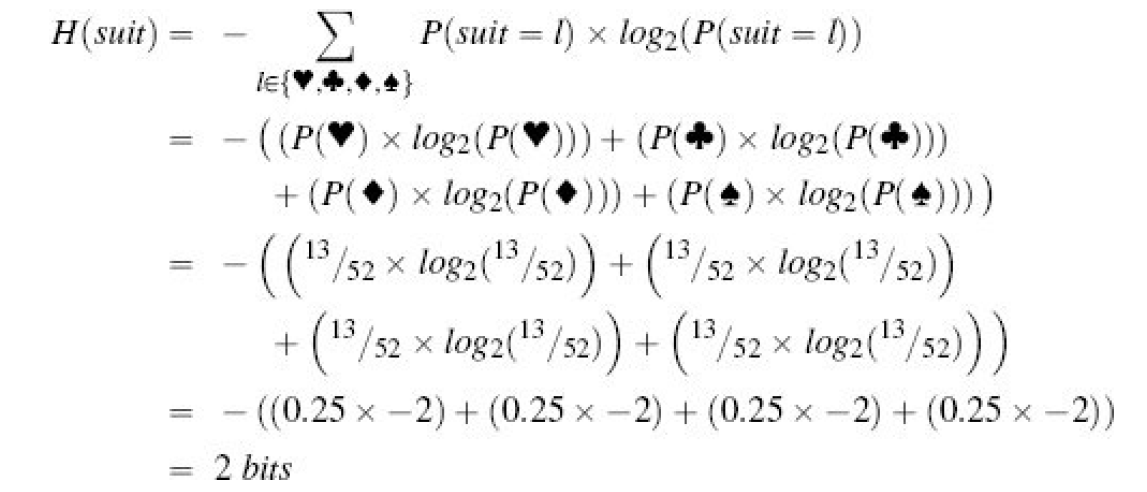

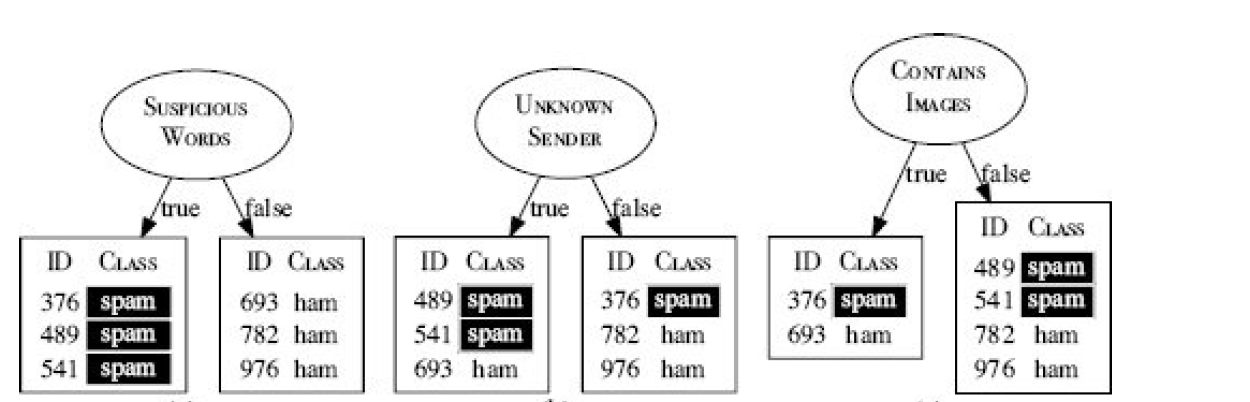

### Information Gain (IG)
The measure of informativeness that we will use is known as information gain and is a measure of the reduction in the overall entropy of a set of instances that is achieved by testing on a descriptive feature

#### Three step process to measure IG
1. Compute the entropy of the original dataset with respect to the target feature. This
gives us an measure of how much information is required in order to organize the
dataset into pure sets.
2. For each descriptive feature, create the sets that result by partitioning the instances in
the dataset using that feature values, and then sum the entropy scores of each of
these sets. This gives a measure of the information that remains required to organize
the instances into pure sets after we have split them using the descriptive feature.
3. Subtract the remaining entropy value (computed in step 2) from the original entropy
value (computed in step 1) to give the information gain.

#### Step 1
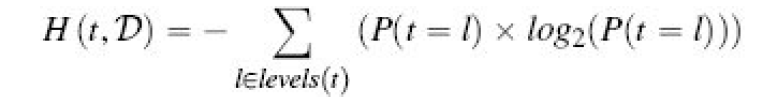

#### Step 2
When we partition the dataset using the descriptive feature d we create a number of partitions (or sets) D(d=l1),D2(d=l2)...Dk(d=lk) etc., where l1…lk are the k levels that feature d can take. Each partition contains the instances in that have a value of level li for the d feature. The entropy remaining after we have tested d is a weighted sum of the entropy, still with respect to the target feature, of each partition. The weighting is determined by the size of each partition—so a large partition should contribute more to the overall remaining entropy than a smaller partition.

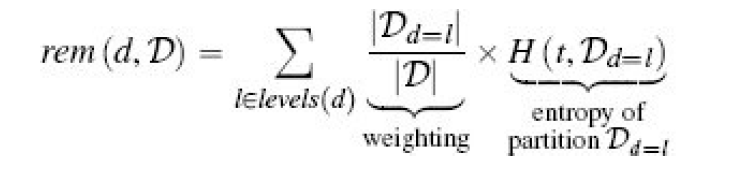

#### Step 3
we can now formally define information gain made from splitting the dataset using the feature d as
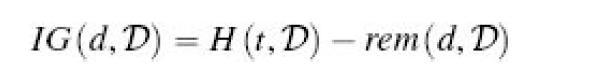

#### Applying IG on the Spam Detection Data

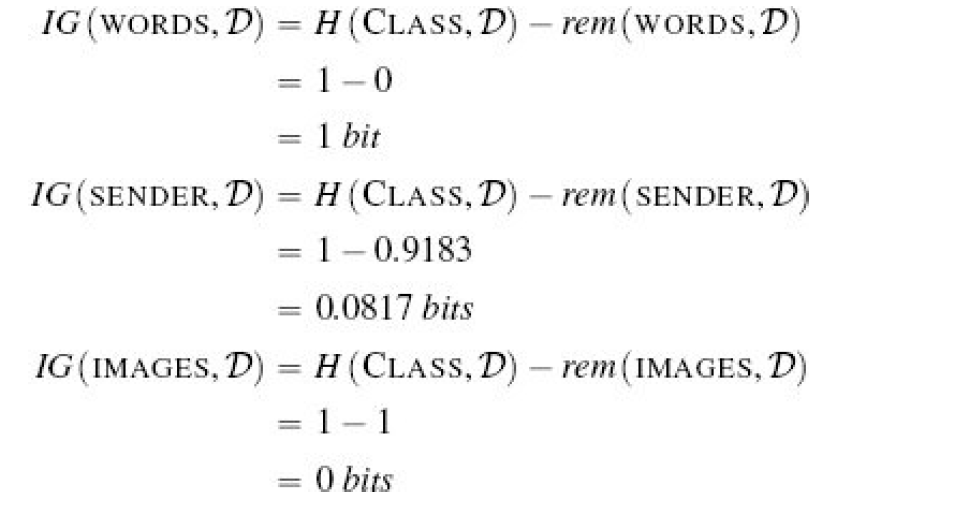

### ID3 Algorithm for Decision Tree Construction
* Builds the tree in a recursive, depth-first manner, beginning at the root node and working down to the leaf nodes.
* Begins by choosing the best feature to test by computing the information gain of all the features in the training dataset.
* A root node is then added to the tree and labeled with the selected test feature.
* The training dataset is then partitioned using the test feature. There is one partition created for each possible test result, which contains the training instances that returned that result. For each partition a branch is grown from the node. 
* The process is then repeated for each branch using the relevant partition of the training set in place of the full training set and with the selected test feature excluded from further testing. 
* This process is repeated until all the instances in a partition have the same target level, at which point a leaf node is created and labeled with that level.

**Note: the information gain for a particular descriptive feature may be different at different nodes in the tree because it will be computed on different subsets of the full training dataset**
* Consequently, a feature with a low information gain at the root node (when the full dataset is considered) may have a high information gain score at one of the interior nodes because it is predictive on the subset of instances that are considered at that interior node

### Gini Index
Anoher commonly used impurity metric for Decision Trees

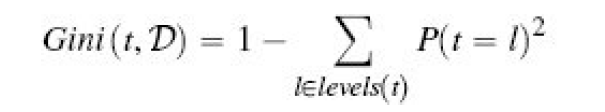

where
* D is a dataset with a target feature t; levels(t) is the set of levels in the domain of the target feature; and P(t = l) is the probability of an instance of D having the target level l.
* The Gini calculates how often the instances in a dataset would be misclassified if predictions were made based only on the distribution of the classes in the dataset. 
* For example, if there were two classes with equal likelihood in a dataset, then the expected rate of misclassification would be 0.5, and if there were four target levels with equal likelihood, then the expected rate of misclassification would be 0.75. 
* The Gini index is 0 when all the instances in the dataset have the same class and when there are k possible classes with equal likelihood. 
* Gini index scores are always between 0 and 1, and in some contexts this may make it easier to compare Gini indexes across features

### Using Gini index
Basically the same as IG:
* Calculate the Gini index for the full dataset 
* Subtract the sum of the weighted Gini index scores for the partitions created by splitting with the feature.


### Handling Numerical Features
**Partitioning the feature values using a threshold**
* Instances in the dataset are sorted according to the values of the feature that occur in the datasdet.
* The adjacent instances in the ordering that have different classes are then selected as possible threshold points. It can be shown that the optimal threshold value must lie at one of the boundaries between adjacent instances with different classes.
* The optimal threshold is found by computing the information gain for each of the class transition boundaries and selecting the boundary with the highest information gain as the threshold. 
* Once a threshold has been set, the continuous feature can compete with the other categorical features for selection as the splitting feature at any node.

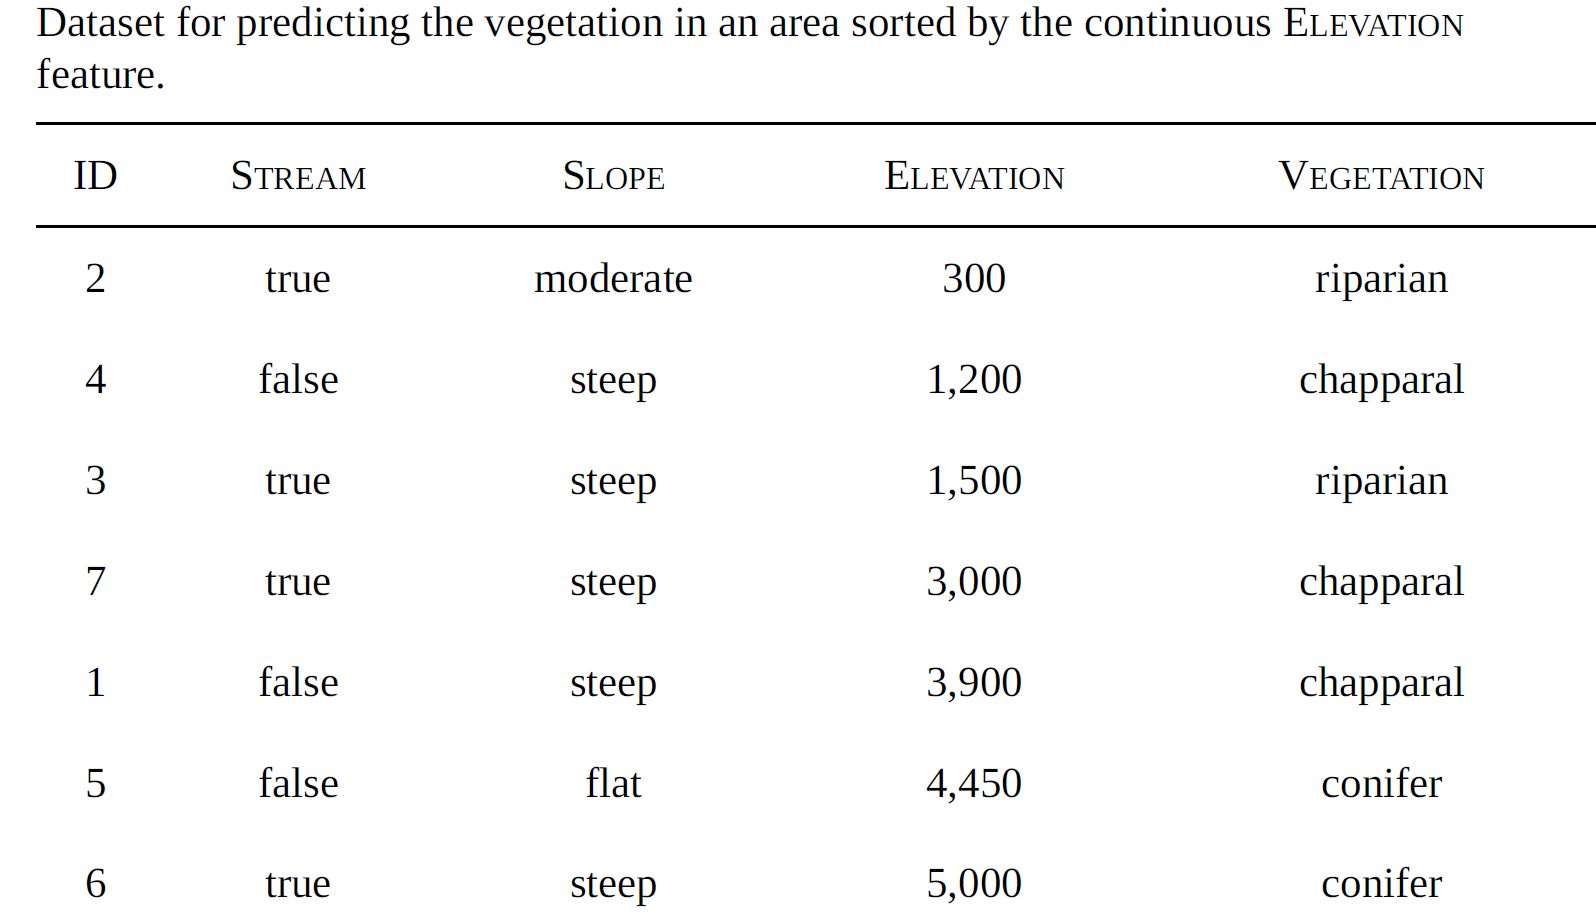

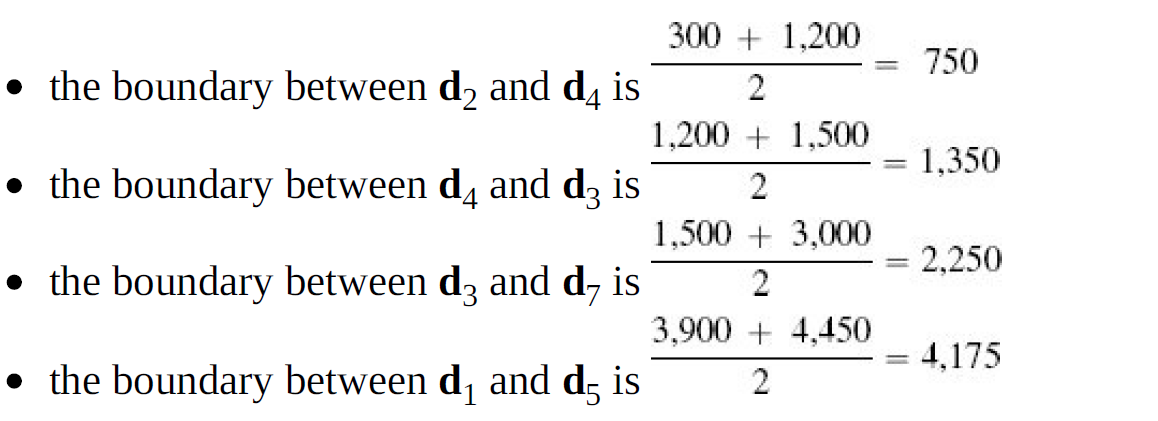

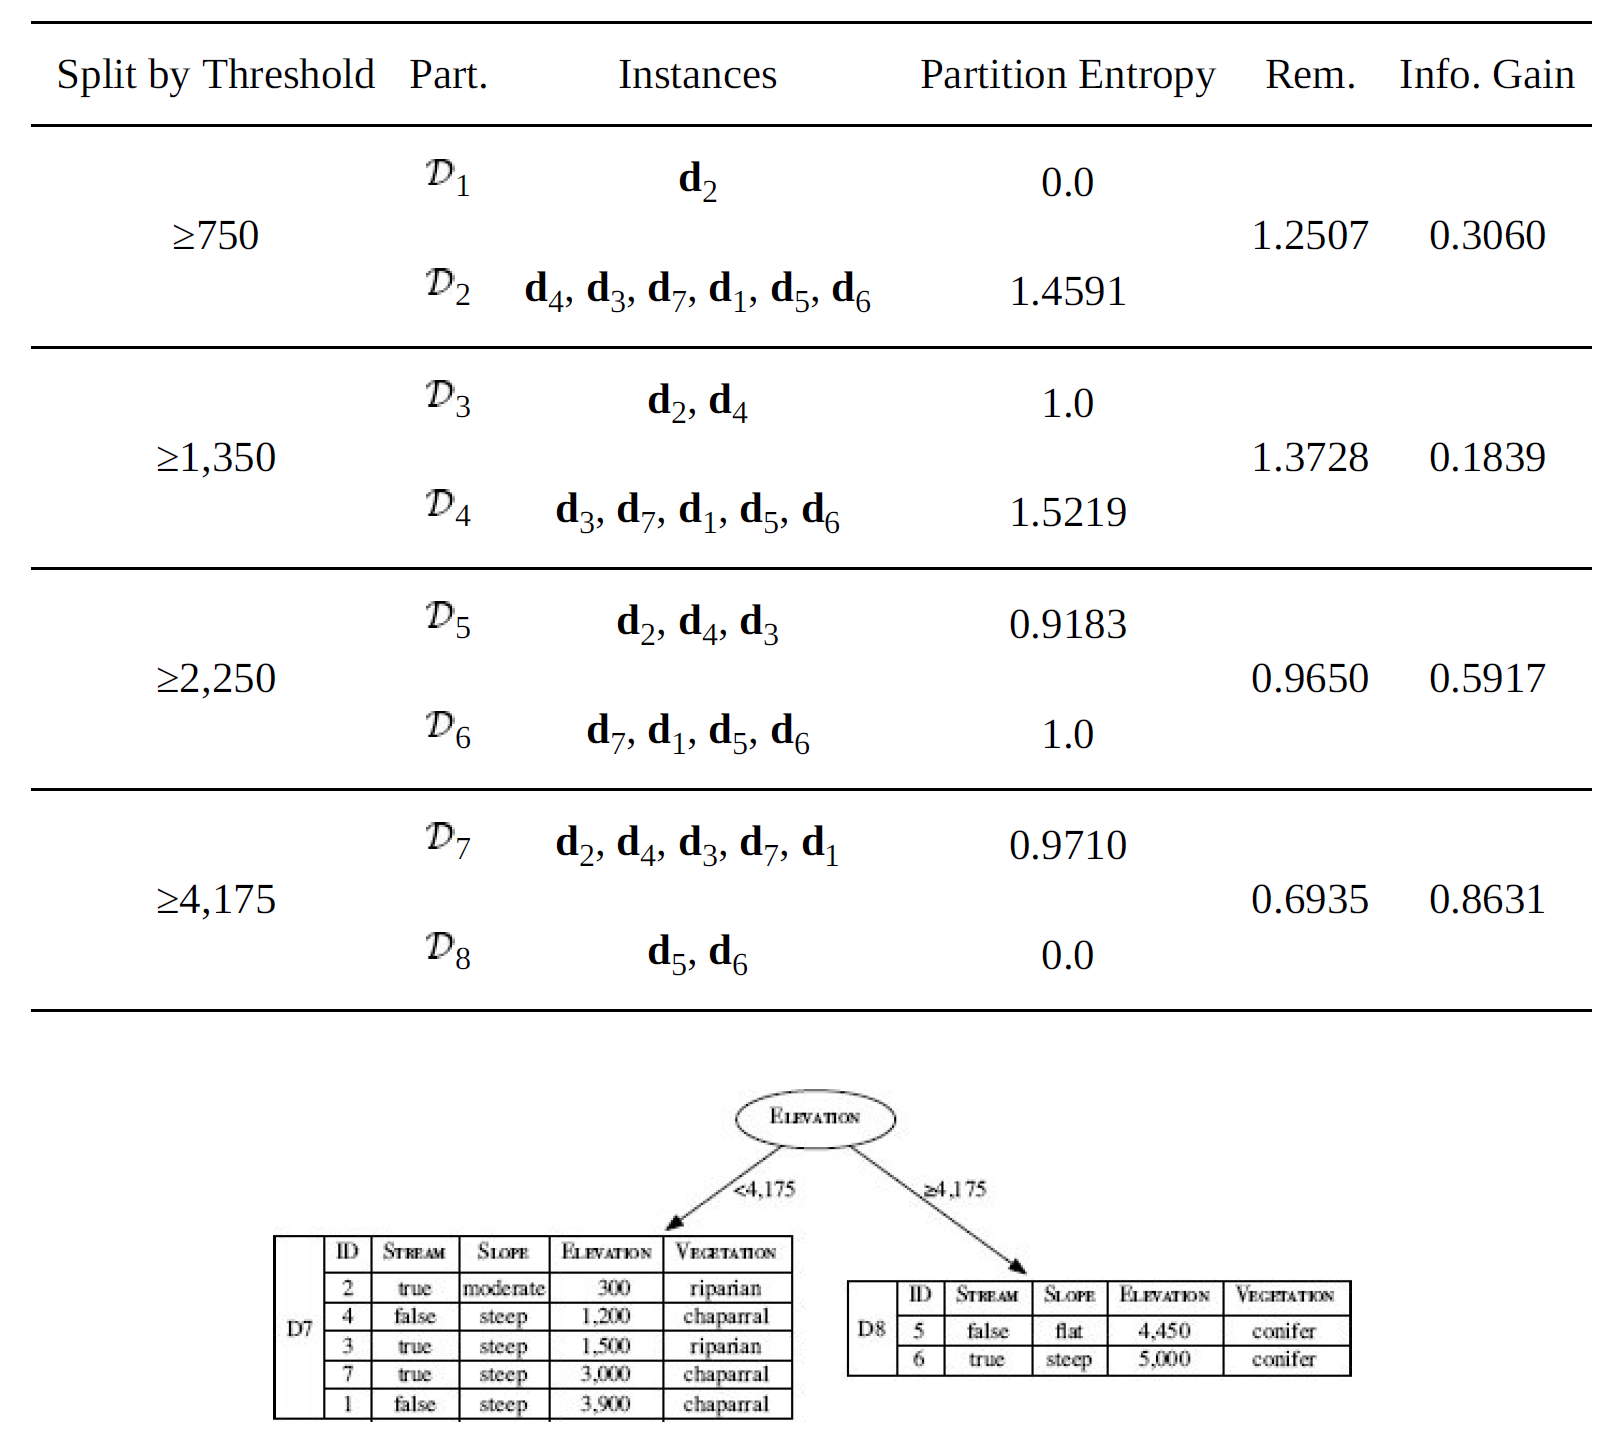

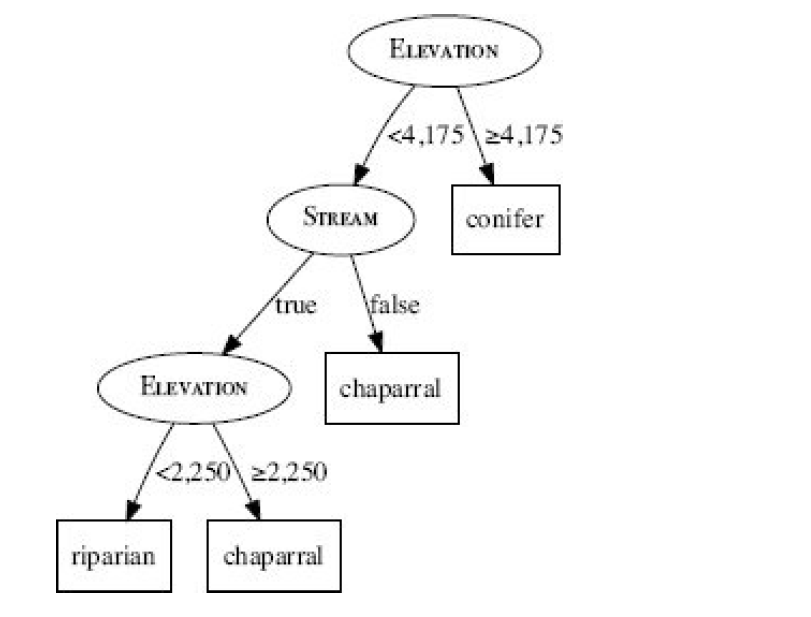

### Predicting Continuous Targets: Regression Trees
* Output the mean value of the target variable in training examples found in the leaf node (if more than 1)
* Error of a regression tree when making a prediction is the difference between the mean of the instances in the leaf and the correct target value


#### Using Variance to build Regression Trees
We can construct regression trees in a manner that reduces the variance in the target feature values of the training set at each leaf node in the tree. 
* We can adapt the ID3 algorithm to use a measure of variance1 rather than a measure of entropy when selecting
the best feature.

Using variance as our measure of impurity, the impurity at a node can be calculated as:
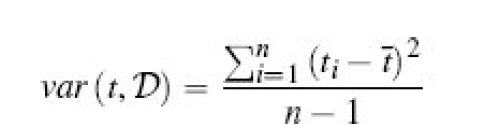


where:
* D is the dataset that has reached the node 
* n is the number of instances in D
* t(bar) is the mean of the target feature for the dataset
* ti iterates across the target value of each instance in D

On each node we select the feature that minimizes the weighted variance across the resulting partitions
#### Weighted Variance
* Sum the variance of the target within each partition by splitting the data on a descriptive feature multiplied by the fraction of the dataset in each partition. 
* At each node the algorithm will choose the feature to split on by selecting the feature with the lowest weighted variance for the target feature
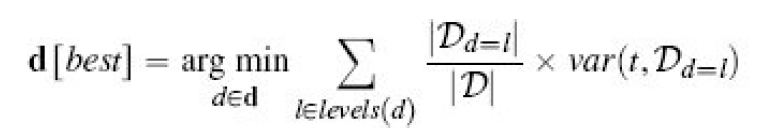



### Early Stopping to avoid overfitting
**Extreme partitioning of the dataset into sets of single instances can happen if there are a lot of features in the dataset, or if there are one or more continuous features that the algorithm is allowed to split on repeatedly**

* If there is any noise in the training data (something that is likely in real applications), then the leaf nodes generated due to noisy instances will result in unreliable predictions for queries. 
* To avoid this kind of extreme partitioning, we introduce an early stopping criterion into the algorithm for building regression trees
* Simplest criterion: Stop partitioning if the number of training examples in the partition at the node we are processing is less than some threshold, usually around 5% of the overall dataset size


### Tree Pruning to avoid Overfitting
#### Reasons for Overfitting
* Sampling variance
* Noise in the training set

**How Decision Trees Overfit?**
* Splitting the data on irrelevant features that only appear relevant due to noise or sampling variance
in the training data
* The likelihood of overfitting occurring increases as a tree gets deeper because the resulting predictions are based on smaller and smaller subsets as the dataset is partitioned after each feature test in the path
**Tree Pruning**
* Identifies and removes subtrees within a decision tree that are likely to be due to noise and sample variance in the training set used to induce it. In cases where a
* Pruning the subtree means replacing the subtree with a leaf node that makes a prediction based on the majority target feature level (or average target feature value) of the dataset created by merging the instances from all the leaf nodes in the subtree. * The simplest way to prune a decision tree is to introduce early stopping criteria 
* This is often known as **pre-pruning**.
#### Simple Pruning strategies:
* Stop creating subtrees when the number of instances in a partition falls below a threshold
* When the information gain (or whatever other feature selection metric is being used) measured at a node is not considered to be sufficient to make partitioning the data worthwhile
* When the depth of the tree goes beyond a predefined limit
* 
#### Advanced approaches to pre-pruning
* Use statistical significance tests to determine the importance of subtrees, for example, χ2 pruning (pronounced chisquared).

#### Pre-pruning Vs Post-pruning
* Pre-runing is computationally efficient and can work well for small datasets. 
* However, by stopping the partitioning of the data early, we may fail to create the most effective trees by missing out interactions between features that emerge within subtrees that are not obvious when the parent nodes are being considered. 
* Pre-pruning can mean that these useful subtrees are never created

#### Post-pruning
* Alternative approach in which the algorithm is allowed to grow a tree to completion, and then each branch on the tree is
examined in turn.
* Branches that are deemed likely to be due to overfitting are pruned.
* Compare the error rate in the predictions made by a decision tree when a given subtree is included and when it is pruned
* Error rate is measured on the validation set that. Error rate measures the number of predictions made by the tree that are incorrect.
* A subtree is pruned if validation error rate with the subtree removed is no greater than the error rate when the subtree is included.
* Because the instances in the validation set are not used during training, the error rate on the validation set provides a good estimate of the generalization capability of a decision tree

#### Reduced error pruning
* Popular version of post-pruning based on error rates
* A decision tree is built to completion and then the tree is searched in an iterative, bottom-up, left-to-right manner for subtrees that can be pruned
* The error rate on validation set made at the root node of each subtree is compared to the error rate resulting from predictions made at the leaves of the subtree. 
* If the error rate at the subtree root node is less than or equal to the combined error rate at the leaves, the subtree is pruned